In [1]:
import pandas as pd
import numpy as np
import soynlp
from soynlp.noun import LRNounExtractor_v2
from soynlp import DoublespaceLineCorpus
from soynlp.word import WordExtractor
from soynlp.tokenizer import LTokenizer
from soynlp.tokenizer import MaxScoreTokenizer

import warnings
warnings.filterwarnings('ignore')

In [2]:
import collections

def corpus_init():
    f = open("./corpus_target.txt", 'w',encoding='utf8')
    f.write('')
    f.close()

def corpus_save(target):
    save = '\n'.join(target)
    f = open("./corpus_target.txt", 'a',encoding='utf8')
    f.write(save)
    f.close()
    
    
def stop_save(target):
    save = '\n'.join(target)
    f = open("./stopwords.txt", 'a',encoding='utf8')
    f.write(save)
    f.close()
    
def return_tokenizer():
    corpus = DoublespaceLineCorpus("./corpus_target.txt",iter_sent=True)
    noun_extractor = LRNounExtractor_v2(verbose=True) # n_gram?
    nouns = noun_extractor.train_extract(corpus)
    scores = {word:score.score for word, score in nouns.items()}
    tokenizer = LTokenizer(scores=scores)
    return tokenizer

In [3]:
student = pd.read_csv('./student_sentence_data.csv')
teacher = pd.read_csv('./teacher_sentence_data.csv')

target = list(teacher['answer'].str.replace('[^0-9가-힣]',' '))
target.extend(list(student['answer'].str.replace('[^0-9가-힣]',' ')))

In [4]:
corpus_init()
corpus_save(target)
tokenizer = return_tokenizer()

[Noun Extractor] use default predictors
[Noun Extractor] num features: pos=3929, neg=2321, common=107
[Noun Extractor] counting eojeols
[EojeolCounter] n eojeol = 13631 from 5338 sents. mem=0.167 Gb                    
[Noun Extractor] complete eojeol counter -> lr graph
[Noun Extractor] has been trained. #eojeols=35740, mem=0.190 Gb
[Noun Extractor] batch prediction was completed for 5368 words
[Noun Extractor] checked compounds. discovered 321 compounds
[Noun Extractor] postprocessing detaching_features : 2365 -> 2311
[Noun Extractor] postprocessing ignore_features : 2311 -> 2272
[Noun Extractor] postprocessing ignore_NJ : 2272 -> 2256
[Noun Extractor] 2256 nouns (321 compounds) with min frequency=1
[Noun Extractor] flushing was done. mem=0.197 Gb                    
[Noun Extractor] 62.14 % eojeols are covered


In [5]:
stop = ['은','는','이','가','하','아','것','들','의','있','되','수','보','주','등','한','를','을','에','적','할','인가가',
        '해서','된','도','인','로','함']
stop_words = set(stop)
def cleaner(target_sentence):
    target_sentence = collections.deque(target_sentence)
    for _ in range(len(target_sentence)):
        tar = target_sentence.popleft()
        if tar not in stop_words:
             target_sentence.append(tar)
    return list(target_sentence)

In [6]:
clean_student_ans = [cleaner(tokenizer(i)) for i in student['answer']]

array([[<AxesSubplot:title={'center':'count'}>]], dtype=object)

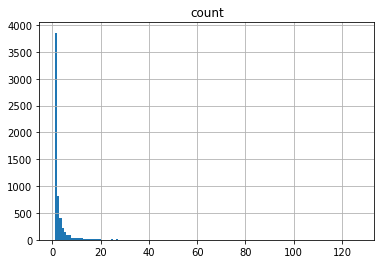

In [7]:
corpus = []
for ans in clean_student_ans:
    corpus.extend(ans)
tp = pd.DataFrame(collections.Counter(corpus),index=['count']).transpose()
tp.sort_values(by='count',ascending=False).hist(bins=130) # 사용된단어 개수 분포 : 1번 등장단어빈도가 매우 많다.

In [8]:
tp.sort_values(by='count',ascending=False) # 사용된단어 5909 # corpus가 작다고 판단.

,count
그들,127
하는,123
에서,120
있다,111
으로,104
...,...
마감,1
흘러,1
나이는,1
정치적,1


In [9]:
clean_teacher_ans = [cleaner(tokenizer(i)) for i in teacher['answer']]

array([[<AxesSubplot:title={'center':'count'}>]], dtype=object)

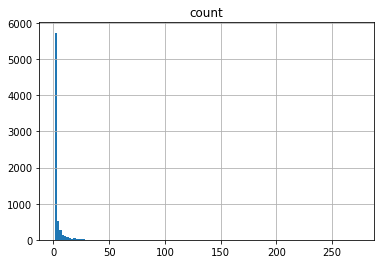

In [10]:
corpus = []
for ans in clean_teacher_ans:
    corpus.extend(ans)
tp = pd.DataFrame(collections.Counter(corpus),index=['count']).transpose()
tp.sort_values(by='count',ascending=False).hist(bins=130) # 사용된단어 개수 분포 : 1번 등장단어빈도가 매우 많다.

In [11]:
tp.sort_values(by='count',ascending=False) # 선생님답변에서 사용된단어가 더 많다.

,count
하는,274
그리고,240
그,212
그들,212
더,191
...,...
타버릴,1
않을까,1
두려웠다.,1
방대한,1


           length      counts
count  109.000000  109.000000
mean    56.532110   15.908257
std     34.169666   15.626154
min      1.000000    1.000000
25%     28.000000    2.000000
50%     55.000000    8.000000
75%     82.000000   27.000000
max    135.000000   50.000000
           length      counts
count  141.000000  141.000000
mean    75.588652   12.297872
std     43.637315    9.485888
min      3.000000    1.000000
25%     39.000000    3.000000
50%     74.000000   10.000000
75%    109.000000   21.000000
max    188.000000   34.000000


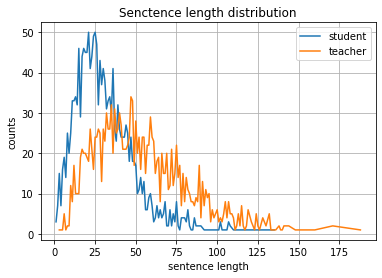

In [31]:
import matplotlib.pyplot as plt
tp = collections.Counter([len(i)for i in student['answer']]) # 문장길이
df = pd.DataFrame([tp.keys(),tp.values()]).transpose()
df.columns = ['length','counts']
df = df.sort_values(by='length')
plt.plot(df['length'],df['counts'])

print(df.describe())

tp = collections.Counter([len(i)for i in teacher['answer']]) # 문장길이
df = pd.DataFrame([tp.keys(),tp.values()]).transpose()
df.columns = ['length','counts']
df = df.sort_values(by='length')
plt.plot(df['length'],df['counts'])

plt.grid()
plt.legend(['student','teacher'])
plt.xlabel('sentence length')
plt.ylabel('counts')
plt.title('Senctence length distribution')

print(df.describe())

In [30]:
df.describe()

,length,counts
count,141.000000,141.000000
mean,75.588652,12.297872
std,43.637315,9.485888
min,3.000000,1.000000
25%,39.000000,3.000000
50%,74.000000,10.000000
75%,109.000000,21.000000
max,188.000000,34.000000
